# part 1
let's practice what we have learned so far and visualise some data !

in order to validate this checkpoint you are asked to accomplish the following tasks:

After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values

As a next step apply what you have learned in the course to preprocess your data 

3. Let’s begin now the data visualization part : 

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem  

Visualise the corrolation between Sex and Age in a plot of your choosing, the visualised plot should give us obvious deductions concerning the importance of age and Sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals 
Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Try running the function, analyse what does it do exactly and what are the utilities of it, write a pragraph describing your analysis (the paragraph should be in english)

Use the groupby function combined with the mean() to view the relation between pclass and survived 
As a final step try to drop the useless columns such as Names



# part1 

## importing the dataset  and creation of the dataframe

In [135]:
import pandas as pd 
df=pd.read_csv("titanic-passengers.csv",sep=";")

In [136]:
pass_tit=pd.DataFrame(df)
pass_tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


## informations about the dataset

In [137]:
pass_tit.head(0)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [138]:
pass_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# relation between the age and sex of passengers and their survival

## observing the data and cleaning it 

In [139]:
pass_tit["Age"].isnull().sum()

177

In [140]:
pass_tit["Age"].fillna(pass_tit["Age"].mean(),inplace=True)
pass_tit["Age"].isnull().sum()


0

In [141]:
pass_tit["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [142]:
dict1={
    "male":1,
    "female":0,
    "No":0,
    "Yes":1,
    "S":0,
    "C":1
}

pass_tit.replace(dict1,inplace=True)
pass_tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,NaN,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,NaN,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,NaN,0
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,1
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,NaN,1
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,NaN,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,NaN,0


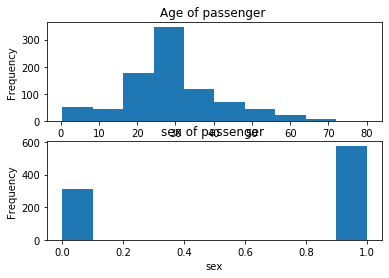

In [143]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.xlabel("Age")
plt.title("Age of passenger ")
pass_tit["Age"].plot.hist()
plt.subplot(2,1,2)
plt.xlabel("sex")
plt.title("sex of passenger ")
pass_tit["Sex"].plot.hist()





of these two histograms we can deduce that most of the passengers (almost 580) are male and almost 300 are female 
the maximum number of passengers have age between 18 and 30 they are young people.

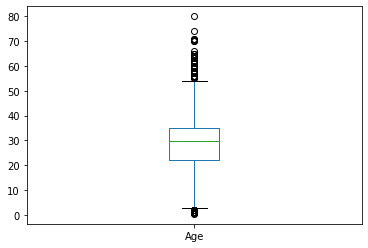

In [144]:

pass_tit["Age"].plot.box()


this plot of the box give us a number of outliers that should be dropped 
the mean of the values isn't in the exact center 
the interquantile range is beween 22 and 35 years 
in the next operation we are dropping the outliers 

In [145]:
from scipy import stats
import numpy as np
df=pass_tit[["Sex","Age", "Survived" ]]
z_scores = stats.zscore(df)
#calculate z-scores of `df`
print(z_scores )
abs_z_scores = np.abs(z_scores)
print(abs_z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)
print(filtered_entries)
new_df = df[filtered_entries]

print(new_df)


[[ 0.73769513 -0.1307545  -0.78927234]
 [ 0.73769513 -0.36161755 -0.78927234]
 [ 0.73769513 -0.7463893  -0.78927234]
 ...
 [-1.35557354  0.02315421 -0.78927234]
 [ 0.73769513  0.         -0.78927234]
 [-1.35557354 -0.82334365  1.2669898 ]]
[[0.73769513 0.1307545  0.78927234]
 [0.73769513 0.36161755 0.78927234]
 [0.73769513 0.7463893  0.78927234]
 ...
 [1.35557354 0.02315421 0.78927234]
 [0.73769513 0.         0.78927234]
 [1.35557354 0.82334365 1.2669898 ]]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  T

we have used in this step the zscore function to filter the data and drop the outliers of the studied Dataset ( specifically the age and sex) we have now 884 passengers not 891.

## correlation between age and survival

In [146]:
dict2={
    0: " not survived", 
    1:"survived"
}
new_df["Survived"].replace(dict2,inplace=True)
new_df


C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Sex,Age,Survived
0,1,28.000000,not survived
1,1,25.000000,not survived
2,1,20.000000,not survived
3,0,29.000000,not survived
4,1,31.000000,not survived
...,...,...,...
886,0,14.000000,survived
887,1,22.000000,not survived
888,0,30.000000,not survived
889,1,29.699118,not survived


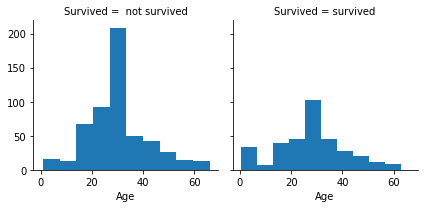

In [147]:
import seaborn as sns 
g=sns.FacetGrid(new_df, col="Survived")
g.map(plt.hist,"Age")

the maximum of both the hist are of age almost at 30 but the number of the non survived at 30 is bigger
for age between 30 and 70 the same configuration is between survived and not survived
kids who survived surpass kids who didnit
the number of teenagers  who drawned is bigger than the number of survived 


## correlation between sex and survival

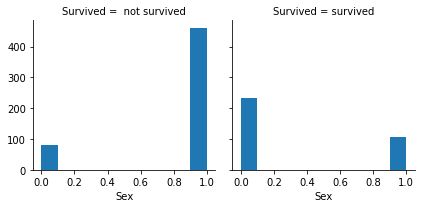

In [148]:
g1=sns.FacetGrid(new_df, col="Survived")
g1.map(plt.hist,"Sex")

0 :  female 
1: Male
most of males didn't survive almost 500 passengers and only 100 survived 
most of females survived almost 230 and less than 100 have drawned 
may be because in  the evacuation in security boats they started evacuating women and kids at first 


## correlation between sex/age and survival

In [149]:
dict3={
    0:"Female",
    1:"Male"
}
new_df["Sex"].replace(dict3, inplace=True)
new_df

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Sex,Age,Survived
0,Male,28.000000,not survived
1,Male,25.000000,not survived
2,Male,20.000000,not survived
3,Female,29.000000,not survived
4,Male,31.000000,not survived
...,...,...,...
886,Female,14.000000,survived
887,Male,22.000000,not survived
888,Female,30.000000,not survived
889,Male,29.699118,not survived


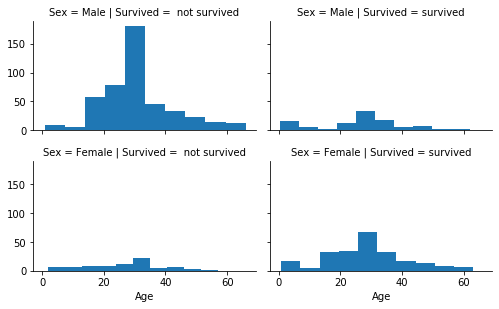

In [150]:
grid=sns.FacetGrid(new_df,row="Sex",col="Survived", height=2.2, aspect=1.6)
grid.map(plt.hist,"Age")

most of male passengers didn't survived specifically beween the age of 20 to 40
most of female survived specially beween 18 to 40 years 

# studying other features 
relation between fare,  parch and SibSp


In [151]:
fapaSi=pass_tit[["Fare","Parch","SibSp"]]
fapaSi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    891 non-null    float64
 1   Parch   891 non-null    int64  
 2   SibSp   891 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


there is no nulls in the dataframe

In [152]:
fapaSi[["Parch","Fare"]].groupby(["Parch"], as_index=True).mean()

,Fare
Parch,
0,25.586774
1,46.778180
2,64.337604
3,25.951660
4,84.968750
5,32.550000
6,46.900000


In [153]:
fapaSi[["Parch","SibSp"]].groupby(["Parch"], as_index=True).mean()

,SibSp
Parch,
0,0.237463
1,1.084746
2,2.062500
3,1.000000
4,0.750000
5,0.600000
6,1.000000


the relation between Parch and Sibsp exists and is good correlation and its normal that a person having kids have also sibling and spouse 
but the relation between the fare and the parch number isn't clear because it depends on the class or the ticket 

 ## correlation between the class of the ticket and the survival 
 we want to know if the passengers in fiirst class survival is bigger than class2,3
 


In [154]:
new_df1=pass_tit[["Survived","Pclass"]]
new_df1

,Survived,Pclass
0,0,2
1,0,3
2,0,3
3,0,3
4,0,1
...,...,...
886,1,2
887,0,3
888,0,3
889,0,3


In [155]:
new_df1[["Survived","Pclass"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.950292


the survived people are the most of class 1 and some of class 2 the drawned are the most of class 3

In [156]:
new_df1["Survived"].replace(dict2,inplace=True)
new_df1


C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Survived,Pclass
0,not survived,2
1,not survived,3
2,not survived,3
3,not survived,3
4,not survived,1
...,...,...
886,survived,2
887,not survived,3
888,not survived,3
889,not survived,3


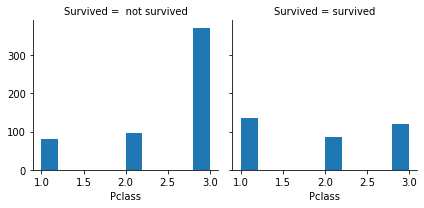

In [157]:
g2=sns.FacetGrid(new_df1, col="Survived")
g2.map(plt.hist,"Pclass")

most of the passengers in class 3 have not survived (the most disfavorised materialy and in the condition of the trip )
class1 passengers are in the contrary the passengers who survived the most and drawned the least 

# studying the given function plot_correlation_map( )

In [158]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    

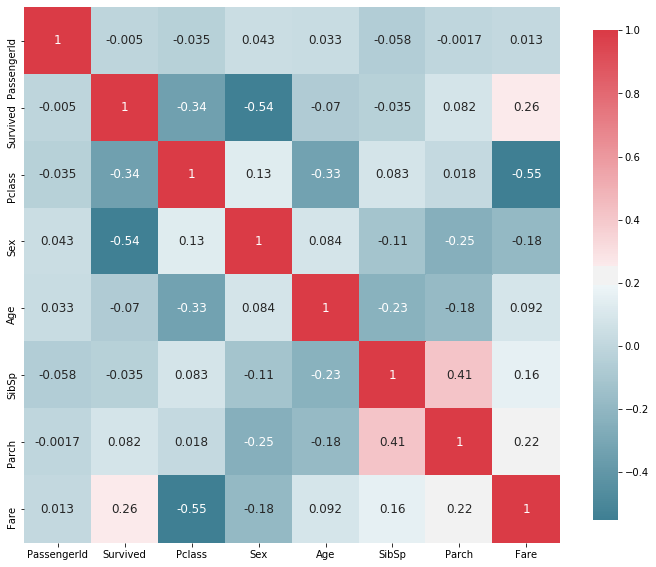

In [159]:
plot_correlation_map( pass_tit )

## the role of the function 
this function draws a grid expliciting the correlation between all series in the dataframe 
in its axis x and y are all the columns of our dataframe 
each parameter is in parfect correlation with himself  corr=100% =1
the other parameter's correlations varies between really small values like the one between parch and Survived in fact there isn't logically a correlation between passengers having kids and their survival
there are also some values strongly correlated like sibsp and parch 0.41 and its again normal to have siblings and be parent with kids in the same trip



###  dropping name

In [160]:
pass_tit1=pass_tit.drop("Name", axis=1)
pass_tit1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,1,28.000000,0,0,248740,13.0000,NaN,0
1,76,0,3,1,25.000000,0,0,348123,7.6500,F G73,0
2,641,0,3,1,20.000000,0,0,350050,7.8542,NaN,0
3,568,0,3,0,29.000000,0,4,349909,21.0750,NaN,0
4,672,0,1,1,31.000000,1,0,F.C. 12750,52.0000,B71,0
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.000000,1,0,237736,30.0708,NaN,1
887,61,0,3,1,22.000000,0,0,2669,7.2292,NaN,1
888,535,0,3,0,30.000000,0,0,315084,8.6625,NaN,0
889,102,0,3,1,29.699118,0,0,349215,7.8958,NaN,0
